1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

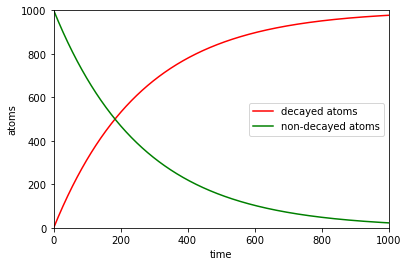

C:\Users\adnan\AppData\Local\Temp\ipykernel_35584\2924166601.py:26: RuntimeWarning: divide by zero encountered in double_scalars
  x_zeros[index] = 2**((-T*math.log(2))/(x[index]**2))


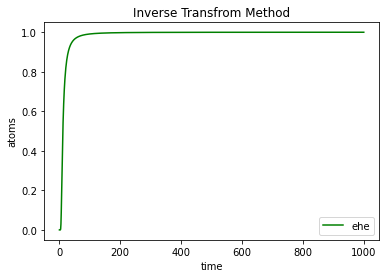

In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from scipy import stats
half_life_t_seconds=3.052*60
ti_count = 1000
pb_start = 0

def pt(num,half_life_t):
    return 1-(2**(-1*(num/half_life_t)))

num = np.linspace(0,1000,1000)

plt.plot(num,ti_count*pt(num,half_life_t_seconds),color='r',label='decayed atoms')
plt.plot(num,ti_count*(1-pt(num,half_life_t_seconds)),color='g',label='non-decayed atoms')
plt.xlabel('time')
plt.ylabel('atoms')
plt.axis([0,1000,0,1000])
plt.legend()
plt.show()

def nondecayed(x,T):
    x_zeros=np.zeros(len(x))
    for index in range(len(x)):
        x_zeros[index] = 2**((-T*math.log(2))/(x[index]**2))
    return x_zeros


random = np.random.random(ti_count)
nondecayed_n=np.sort(nondecayed(random,half_life_t_seconds))

count=np.zeros(ti_count)
index=0

plt.plot(num,nondecayed(num,half_life_t_seconds),label='ehe',color='g')
plt.xlabel('time')
plt.ylabel('atoms')
plt.title('Inverse Transfrom Method')
plt.legend()
plt.show()

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

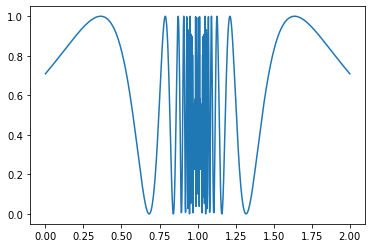

In [4]:
# N=500
N=1000 #The most clearly visible one is N=1000
# N=5000
# N=10000
# N=50000
def f(x):
    return (np.sin(1/(1-x)))**2
x = np.linspace (0.001,1.999,N)
plt.plot(x,f(x))
plt.show()

In [10]:
#Hit/miss Method
def hit_miss(N):
    l=np.zeros(N)
    for index in range (N):
        new_value=10000
        x = 2*np.random.random()
        #to make it between 0 and 2
        y =  np.random.random()
        #between 0 and 1
        count = 0
        if y<f(x):
            count = count+1
        l[index] = 2*count/new_value
    return [np.mean(l),np.std(l)]
hit_miss_res=hit_miss(1000)
print('mean:',hit_miss_res[0])
print('\n Standart Deviation:', hit_miss_res[1])

mean: 0.00013380000000000003

 Standart Deviation: 9.411461098044236e-05


In [13]:
def meanval(N):
    x= np.random.random(N)*2
    I= (np.sum(f(x))*(2/N))
    
    std = 2 * np.sqrt(np.var(f(x)/N))
    return [std,I]


meanval_res = meanval(1000)

print('Integral:',meanval_res[1])
print('Standard deviation:',meanval_res[0])

Integral: 1.3493051977495796
Standard deviation: 0.0006480661739613951


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

In [5]:
def circle(x,y):
    a = (x**2)+(y**2)<=1
    return np.sum(a)
N=10000
x=2*np.random.random(N)-1
y=2*np.random.random(N)-1

v=4 #2 power of 2
area=v/N*circle(x,y)
print('Area of 2D circle:',area)


def circle_10D(a):
    x=np.sum(a**2,axis=0)<=1
    return np.sum(x)

coordinates=(np.random.random((10,N))*2)-1

v_10D=1024#2 power of 10
area_10D=v_10D/N*circle_10D(coordinates)
print("\n\n10D sphere's area:",area_10D)

Area of 2D circle: 3.1420000000000003


10D sphere's area: 2.4576000000000002


4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.

In [7]:
def w(x):
    return 1/(np.sqrt(x))
def I(x):
    return x**(-1/2)/(np.exp(x)+1)
def importance_sampling(x,num):
    dx=x[1]-x[0]
    val=(1/num)*np.sum(I(x)/w(x))*np.sum(w(x))*dx
    return val
x = np.linspace(0.0001,1,100)
res = importance_sampling(x,100)
print("\n Importance Sampling Result:",res)


 Importance Sampling Result: 1.0892251240786897



 Importance Sampling Result: 0.842261266836631


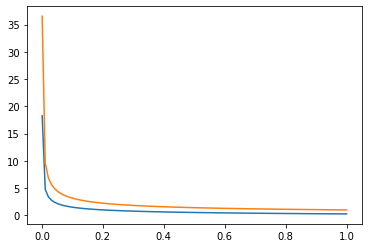

In [8]:
def w(x):
    return 1/(np.sqrt(x))
def I(x):
    return x**(-1/2)/(np.exp(x)+1)
def importance_sampling(x,num):
    dx=x[1]-x[0]
    val=(1/num)*np.sum(I(x)/w(x))*np.sum(w(x))*dx
    return val
x = np.linspace(0.00075,1,100) #0.00075 is the optimum number for the result about 0.84
res = importance_sampling(x,100)
print("\n Importance Sampling Result:",res)


w = w(x)
I = I(x)
plt.plot(x,I)
plt.plot(x,w)